<a href="https://colab.research.google.com/github/KVentionek/projetos/blob/main/atvddNumpyEPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Os 10 paises com maior população tiveram maiores números, em proporção, de mortes por Covid-19.  

 - Devido ao número elevado de pessoas no país, e consequentemente, seu recursos de saúde limitados, o número de mortes pela Covid pode ter sido muito maior, do que em paises com menor população.

In [126]:
dados_paises = pd.read_csv("/content/drive/MyDrive/COVID DEATHS.csv")
dados_paises = dados_paises.dropna(subset=['continent', 'new_deaths_per_million'])

dados_paises_agrupados = dados_paises.groupby('location').agg({'new_deaths_per_million': 'sum', 'population': 'max', 'total_deaths': 'max' , 'total_deaths_per_million': 'max'})

dados_paises_ordenados = dados_paises_agrupados.sort_values(by='population', ascending=False)
dados_paises_ordenados_mortes = dados_paises_agrupados.sort_values(by='total_deaths_per_million', ascending=False)

top_10_paises_populacao = dados_paises_ordenados[['total_deaths', 'population', 'total_deaths_per_million']].head(10)
top_10_paises_mortes = dados_paises_ordenados_mortes[['total_deaths', 'population', 'total_deaths_per_million']].head(10)

print("Top 10 países por população:\n")
print(top_10_paises_populacao)
print("\n\nTop 10 países por mortes por milhão:\n")
print(top_10_paises_mortes)

Top 10 países por população:

               total_deaths  population  total_deaths_per_million
location                                                         
China              120905.0  1425887360                    84.793
India              531000.0  1417173120                   374.690
United States     1118800.0   338289856                  3307.223
Indonesia          161071.0   275501344                   584.647
Pakistan            30652.0   235824864                   129.978
Nigeria              3155.0   218541216                    14.437
Brazil             700556.0   215313504                  3253.656
Bangladesh          29446.0   171186368                   172.011
Russia             397642.0   144713312                  2747.791
Mexico             333596.0   127504120                  2616.355


Top 10 países por mortes por milhão:

                        total_deaths  population  total_deaths_per_million
location                                                       

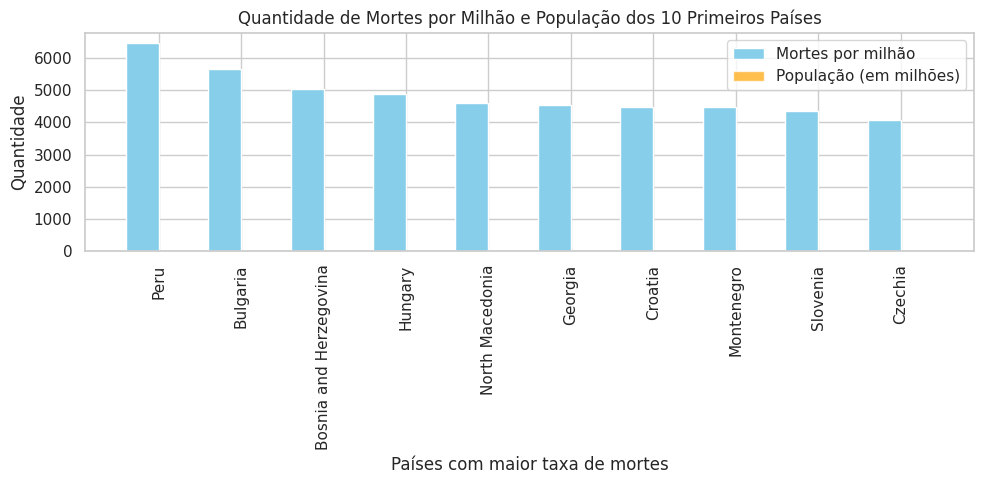

In [124]:
dados_paises_10_primeiros = top_10_paises_mortes
plt.figure(figsize=(10, 5))

posicoes = np.arange(len(dados_paises_10_primeiros))

largura_barras = 0.4

plt.bar(posicoes, dados_paises_10_primeiros['total_deaths_per_million'], width=largura_barras, color='skyblue', label='Mortes por milhão')

plt.bar(posicoes + largura_barras, dados_paises_10_primeiros['population'] / 1000000, width=largura_barras, color='orange', alpha=0.7, label='População (em milhões)')

plt.xlabel('Países com maior taxa de mortes')
plt.xticks(posicoes + largura_barras / 2, dados_paises_10_primeiros.index, rotation=90)

plt.ylabel('Quantidade')
plt.title('Quantidade de Mortes por Milhão e População dos 10 Primeiros Países')
plt.legend()
plt.tight_layout()

plt.show()

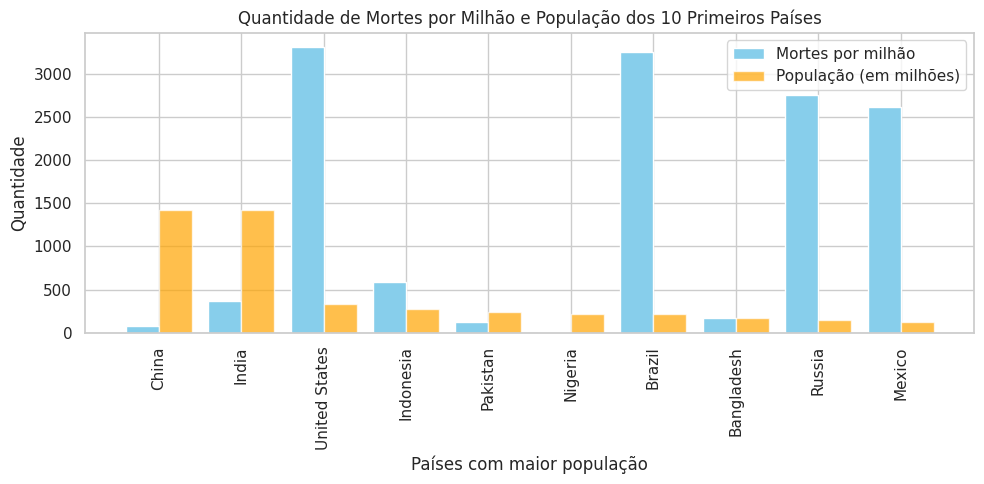

In [125]:
dados_paises_10_primeiros = top_10_paises_populacao
plt.figure(figsize=(10, 5))

posicoes = np.arange(len(dados_paises_10_primeiros))

largura_barras = 0.4

plt.bar(posicoes, dados_paises_10_primeiros['total_deaths_per_million'], width=largura_barras, color='skyblue', label='Mortes por milhão')

plt.bar(posicoes + largura_barras, dados_paises_10_primeiros['population'] / 1000000, width=largura_barras, color='orange', alpha=0.7, label='População (em milhões)')

plt.xlabel('Países com maior população')
plt.xticks(posicoes + largura_barras / 2, dados_paises_10_primeiros.index, rotation=90)

plt.ylabel('Quantidade')
plt.title('Quantidade de Mortes por Milhão e População dos 10 Primeiros Países')
plt.legend()
plt.tight_layout()

plt.show()


RESULTADO

De acordo com os dados analsados, as cidades com maior população não tiveram maior número de morte, nem sequer estão entre eles.





---


Países com maior índice de rigidez nas restrições tem uma taxa de moratalidade menor?

- Verficar se as medidas restritivas auxiliou na diminuição da taxa de mortalidade

In [35]:
dados_vacinacao = pd.read_csv('/content/drive/MyDrive/COVID_VACCINATIONS.csv')
dados_vacinacao = dados_vacinacao.dropna(subset=['continent', 'stringency_index'])

dados_mortalidade = pd.read_csv('/content/drive/MyDrive/COVID DEATHS.csv')
dados_mortalidade = dados_mortalidade.dropna(subset=['continent', 'total_deaths_per_million'])

dados_vacinacao_filtrados = dados_vacinacao[['location', 'stringency_index']]
dados_mortalidade_filtrados = dados_mortalidade[['location', 'total_deaths_per_million']]

dados_vacinacao_media_rigidez = dados_vacinacao_filtrados.groupby('location')['stringency_index'].mean()
dados_mortalidade_filtrados = dados_mortalidade_filtrados.groupby('location')['total_deaths_per_million'].last()

df_rigidez = pd.DataFrame({
    'País': dados_vacinacao_media_rigidez.index,
    'Média de Rigidez': dados_vacinacao_media_rigidez.values
})

df_rigidez_mortalidade = pd.merge(df_rigidez, dados_mortalidade_filtrados, left_on='País', right_on='location')

top_10_paises_maior_rigidez = df_rigidez_mortalidade.sort_values(by='Média de Rigidez', ascending=False).head(10)

print("Países com maior índice de rigidez nas restrições:")
top_10_paises_maior_rigidez[['País', 'Média de Rigidez', 'total_deaths_per_million']]

Países com maior índice de rigidez nas restrições:


,País,Média de Rigidez,total_deaths_per_million
35,China,71.470028,84.793
112,Myanmar,64.979507,359.731
71,Honduras,64.075423,1065.001
9,Azerbaijan,60.696651,984.449
76,Iran,60.495870,1643.931
128,Philippines,59.624298,574.771
77,Iraq,59.520930,570.274
177,Zimbabwe,59.403005,348.273
74,India,58.995581,374.690
95,Libya,57.884986,944.902


In [45]:
dados_vacinacao = pd.read_csv('/content/drive/MyDrive/COVID_VACCINATIONS.csv')
dados_vacinacao = dados_vacinacao.dropna(subset=['continent', 'stringency_index'])

dados_mortalidade = pd.read_csv('/content/drive/MyDrive/COVID DEATHS.csv')
dados_mortalidade = dados_mortalidade.dropna(subset=['continent', 'total_deaths_per_million'])

dados_vacinacao_filtrados = dados_vacinacao[['location', 'stringency_index']]
dados_mortalidade_filtrados = dados_mortalidade[['location', 'total_deaths_per_million']]

dados_vacinacao_media_rigidez = dados_vacinacao_filtrados.groupby('location')['stringency_index'].mean()
dados_mortalidade_filtrados = dados_mortalidade_filtrados.groupby('location')['total_deaths_per_million'].last()

df_rigidez = pd.DataFrame({
    'País': dados_vacinacao_media_rigidez.index,
    'Média de Rigidez': dados_vacinacao_media_rigidez.values
})

df_rigidez_mortalidade = pd.merge(df_rigidez, dados_mortalidade_filtrados, left_on='País', right_on='location')

top_10_paises_maior_rigidez = df_rigidez_mortalidade.sort_values(by='Média de Rigidez', ascending=False).head(10)

print("Países com maior índice de rigidez nas restrições:\n")
print(top_10_paises_maior_rigidez[['País', 'Média de Rigidez', 'total_deaths_per_million']])

top_10_paises_menor_mortalidade = df_rigidez_mortalidade.sort_values(by='total_deaths_per_million', ascending=True).head(10)

print("\n\nPaíses com menor taxa de mortalidade por milhão:\n")
print(top_10_paises_menor_mortalidade[['País', 'Média de Rigidez', 'total_deaths_per_million']])




Países com maior índice de rigidez nas restrições:

            País  Média de Rigidez  total_deaths_per_million
35         China         71.470028                    84.793
112      Myanmar         64.979507                   359.731
71      Honduras         64.075423                  1065.001
9     Azerbaijan         60.696651                   984.449
76          Iran         60.495870                  1643.931
128  Philippines         59.624298                   574.771
77          Iraq         59.520930                   570.274
177     Zimbabwe         59.403005                   348.273
74         India         58.995581                   374.690
95         Libya         57.884986                   944.902


Países com menor taxa de mortalidade por milhão:

                             País  Média de Rigidez  total_deaths_per_million
27                        Burundi         16.159572                     1.164
33                           Chad         37.023005                  

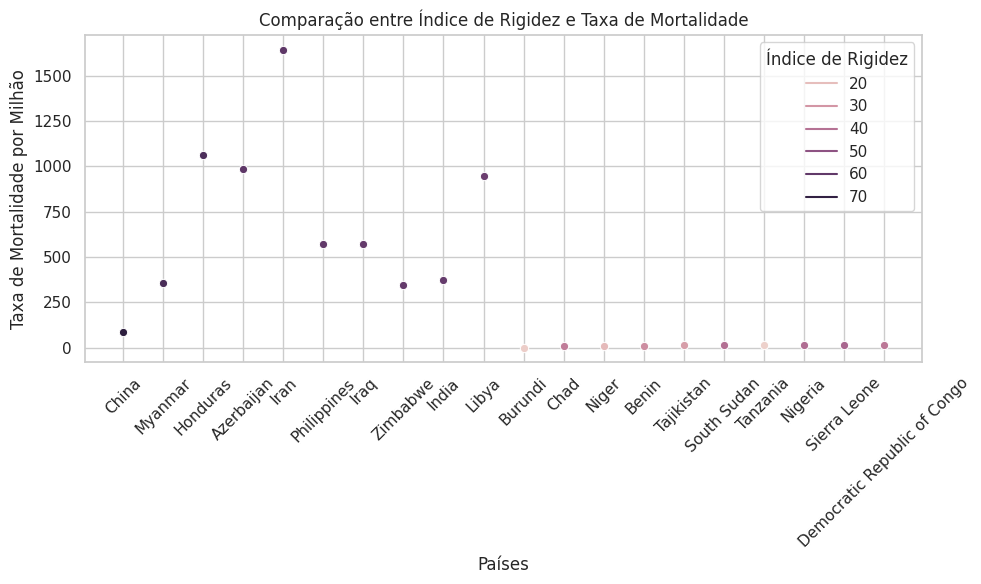

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

combined_df = pd.concat([top_10_paises_maior_rigidez, top_10_paises_menor_mortalidade])
combined_df = combined_df[['País', 'total_deaths_per_million', 'Média de Rigidez']]
combined_df = combined_df.rename(columns={'total_deaths_per_million': 'Taxa de Mortalidade'})

sns.lineplot(data=combined_df, x='País', y='Taxa de Mortalidade', hue='Média de Rigidez', marker='o')

plt.xlabel('Países')
plt.ylabel('Taxa de Mortalidade por Milhão')
plt.title('Comparação entre Índice de Rigidez e Taxa de Mortalidade')

plt.xticks(rotation=45)

plt.legend(title='Índice de Rigidez')

plt.tight_layout()

plt.show()

Analisando esse gráfico podemos ver que o npivel de rigidez não foi fator muito influente na quantidade de mortes, visto que os países mais rígidos tiveram mais mortes que os países menos rígidos



---




Qual a relação entre a quantidade de pacientes hospitalizados e quantos desses foram para a UTI?

 - Para ter uma análise quantitativa dos pacientes que evoluíram para um estado mais grave


In [15]:
covid_19 = np.genfromtxt(
  "/content/drive/MyDrive/COVID DEATHS.csv",
  skip_header=1,
  delimiter=',',
  dtype=[
    ('icu_patients', float),
    ('hosp_patients', float),
    ],
  usecols=(19, 21)
)
covid = pd.DataFrame(covid_19)

<Axes: >

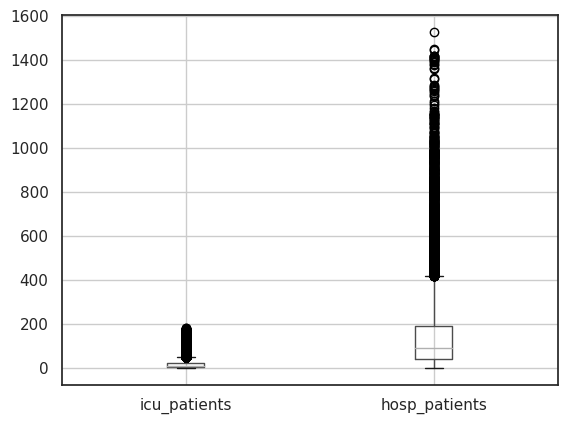

In [16]:
covid.boxplot()

Qual a relação entre a quantidade de pacientes hospitalizados e quantos desses foram para a UTI?

In [17]:
covid[~np.isnan(covid['hosp_patients'])]['hosp_patients'].mean()
uti = covid[~np.isnan(covid['icu_patients'])]['icu_patients'].sum()
hosp = covid[~np.isnan(covid['hosp_patients'])]['hosp_patients'].sum()
porct= (uti/hosp)*100
porct
print(f'{porct:.2f}% dos pacientes hospitalizados foram para a UTI.')

11.71% dos pacientes hospitalizados foram para a UTI.




---
Os paises com maior populacao por area quadrada tiveram maior numero de incidencias, internações  ou mortes?

- Paises com maior populacao por area quadrada tiveram um maior numero de incidencias, internações (geral e UTI) ou mortes.



In [9]:

dados_vacinacao = pd.read_csv('/content/drive/MyDrive/COVID_VACCINATIONS.csv')
dados_vacinacao = dados_vacinacao.dropna(subset=['continent', 'population_density', 'location'])
dados_vacinacao = dados_vacinacao.groupby('location')['population_density'].last()

dados_mortalidade = pd.read_csv('/content/drive/MyDrive/COVID DEATHS.csv')


dados_mortalidade = dados_mortalidade.dropna(subset=['continent', 'total_cases', 'total_deaths', 'hosp_patients', 'icu_patients'])
dados_mortalidade = dados_mortalidade[['location', 'continent', 'total_cases', 'total_deaths', 'hosp_patients', 'icu_patients']]


dados_mortalidade = dados_mortalidade.groupby('location', as_index=False).agg({
    'total_cases': 'last',
    'total_deaths': 'last',
    'hosp_patients': 'sum',
    'icu_patients': 'sum'
})

dados_final = pd.merge(dados_vacinacao, dados_mortalidade, left_on='location', right_on='location')


dados_final['casos_por_densidade'] = dados_final['total_cases'] / dados_final['population_density']
dados_final['mortes_por_densidade'] = dados_final['total_deaths'] / dados_final['population_density']
dados_final['internacoes_hosp_por_densidade'] = dados_final['hosp_patients'] / dados_final['population_density']
dados_final['internacoes_uti_por_densidade'] = dados_final['icu_patients'] / dados_final['population_density']

top_10_paises_densidade = dados_final.nlargest(10, 'population_density')

top_10_paises_densidade


,location,population_density,total_cases,total_deaths,hosp_patients,icu_patients,casos_por_densidade,mortes_por_densidade,internacoes_hosp_por_densidade,internacoes_uti_por_densidade
25,South Korea,527.97,30513721.0,33977.0,469497.0,57284.0,57794.422032,64.354035,889.249389,108.498589
18,Netherlands,508.54,8610372.0,22992.0,549585.0,159057.0,16931.553074,45.211783,1080.711448,312.771857
13,Israel,402.61,4817255.0,12416.0,865554.0,114912.0,11965.065448,30.838777,2149.857182,285.417650
2,Belgium,375.56,4782863.0,34115.0,2022577.0,344753.0,12735.283310,90.837682,5385.496325,917.970497
15,Japan,347.78,33523927.0,74096.0,1859760.0,133011.0,96394.062338,213.054230,5347.518546,382.457301
29,United Kingdom,272.90,22247630.0,178484.0,8070804.0,703297.0,81523.012092,654.027116,29574.217662,2577.123488
16,Luxembourg,231.45,319793.0,1232.0,58950.0,11100.0,1381.693670,5.322964,254.698639,47.958522
28,Switzerland,214.24,4399085.0,13981.0,1022734.0,148916.0,20533.443801,65.258588,4773.777072,695.089619
14,Italy,205.86,25715384.0,189262.0,12392047.0,1094332.0,124916.856116,919.372389,60196.478189,5315.904012
7,Czechia,137.18,4636282.0,42702.0,2197223.0,345913.0,33797.069544,311.284444,16017.079749,2521.599359


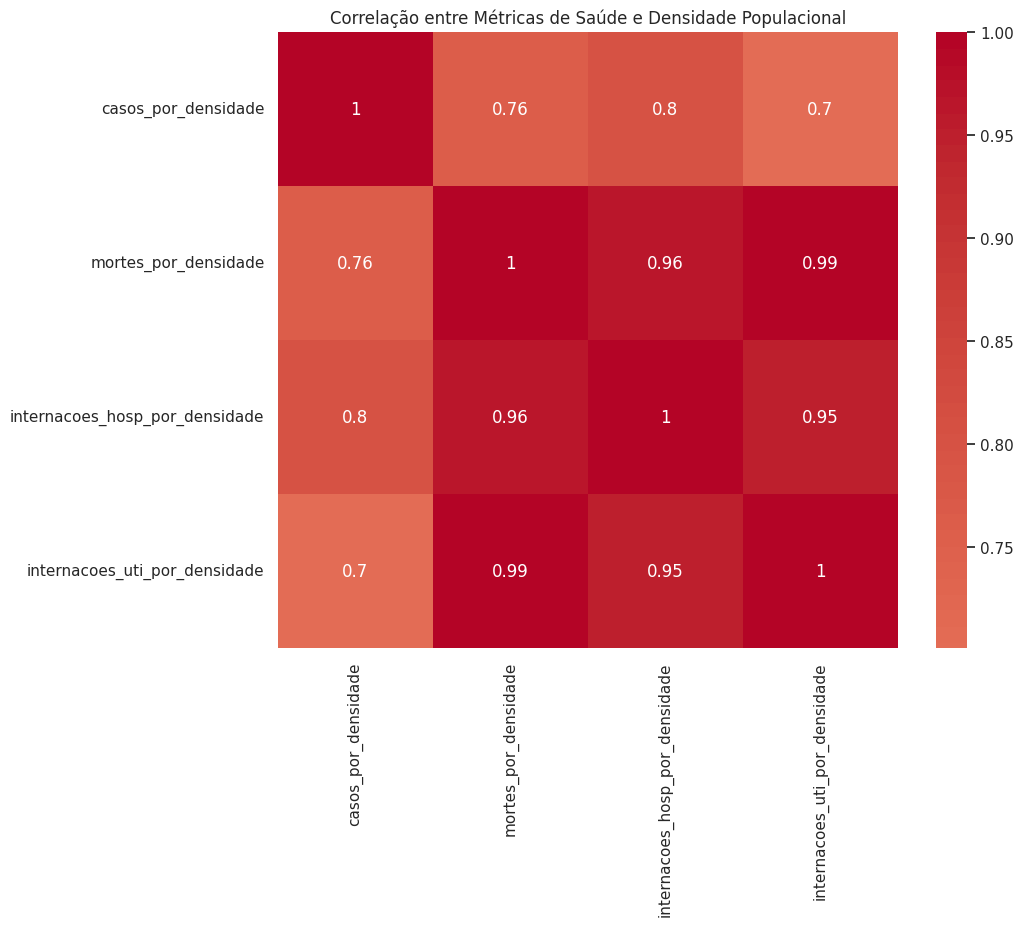

In [10]:
correlation_data = dados_final[['casos_por_densidade', 'mortes_por_densidade', 'internacoes_hosp_por_densidade', 'internacoes_uti_por_densidade']]

correlation_matrix = correlation_data.corr()

sns.set(style="white")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title('Correlação entre Métricas de Saúde e Densidade Populacional')
plt.show()

Com esses resultados podemos ver que os países com maior densidade pepulacional não foram os mais afetados.



---
A quantidade de pessoas hospitalizadas diminuiu quando o total de vacinação aumentou?

- Como o covid foi responsável por lotar os hospitais pelo mundo todo, espera-se que conforme a vacinação progrediu, o número de pessoas hospilatizados tenha diminuido.



Correlação entre pessoas hospitalizadas por milhão e pessoas totalmente vacinadas por cem: 0.032616701256512386


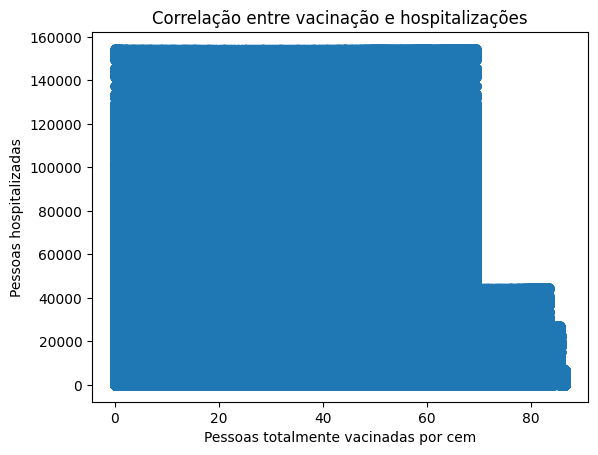

In [8]:

dados_mortalidade = pd.read_csv('/content/drive/MyDrive/COVID DEATHS.csv')

dados_mortalidade = dados_mortalidade.dropna(subset=['continent', 'hosp_patients'])
dados_mortalidade = dados_mortalidade[['location', 'continent', 'hosp_patients']]

dados_vacinacao = pd.read_csv('/content/drive/MyDrive/COVID_VACCINATIONS.csv')

dados_vacinacao = dados_vacinacao.dropna(subset=['continent', 'people_fully_vaccinated_per_hundred'])
dados_vacinacao = dados_vacinacao[['location', 'continent', 'people_fully_vaccinated_per_hundred']]

dados_combinados = pd.merge(dados_mortalidade, dados_vacinacao, on='location', how='inner')

correlation = dados_combinados['hosp_patients'].corr(dados_combinados['people_fully_vaccinated_per_hundred'])

print("Correlação entre pessoas hospitalizadas por milhão e pessoas totalmente vacinadas por cem:", correlation)

plt.scatter(dados_combinados['people_fully_vaccinated_per_hundred'], dados_combinados['hosp_patients'])
plt.xlabel('Pessoas totalmente vacinadas por cem')
plt.ylabel('Pessoas hospitalizadas')
plt.title('Correlação entre vacinação e hospitalizações')
plt.show()


In [154]:
dados_mortalidade = pd.read_csv('/content/drive/MyDrive/COVID DEATHS.csv')

dados_mortalidade = dados_mortalidade.dropna(subset=['continent', 'hosp_patients'])
dados_mortalidade = dados_mortalidade[['location', 'continent', 'date', 'hosp_patients']]

dados_vacinacao = pd.read_csv('/content/drive/MyDrive/COVID_VACCINATIONS.csv')

dados_vacinacao = dados_vacinacao.dropna(subset=['continent', 'people_fully_vaccinated'])
dados_vacinacao = dados_vacinacao[['location', 'continent', 'date', 'people_fully_vaccinated']]

dados_combinados = pd.merge(dados_mortalidade, dados_vacinacao, on=['location', 'date', 'continent'], how='inner')

dados_combinados = dados_combinados.sort_values(by='date')


dados_combinados.head(10)

,location,continent,date,hosp_patients,people_fully_vaccinated
14529,Switzerland,Europe,1/1/2021,2528.0,13.0
593,Belgium,Europe,1/1/2021,2081.0,21.0
3313,Czechia,Europe,1/1/2021,5668.0,1.0
5997,France,Europe,1/1/2021,24263.0,4.0
2013,Canada,North America,1/1/2021,4176.0,3.0
11656,Portugal,Europe,1/1/2021,2806.0,6.0
15970,United States,North America,1/1/2021,121053.0,56306.0
6940,Israel,Asia,1/1/2021,1542.0,6.0
11204,Norway,Europe,1/1/2022,295.0,3929341.0
2378,Canada,North America,1/1/2022,3865.0,29442935.0


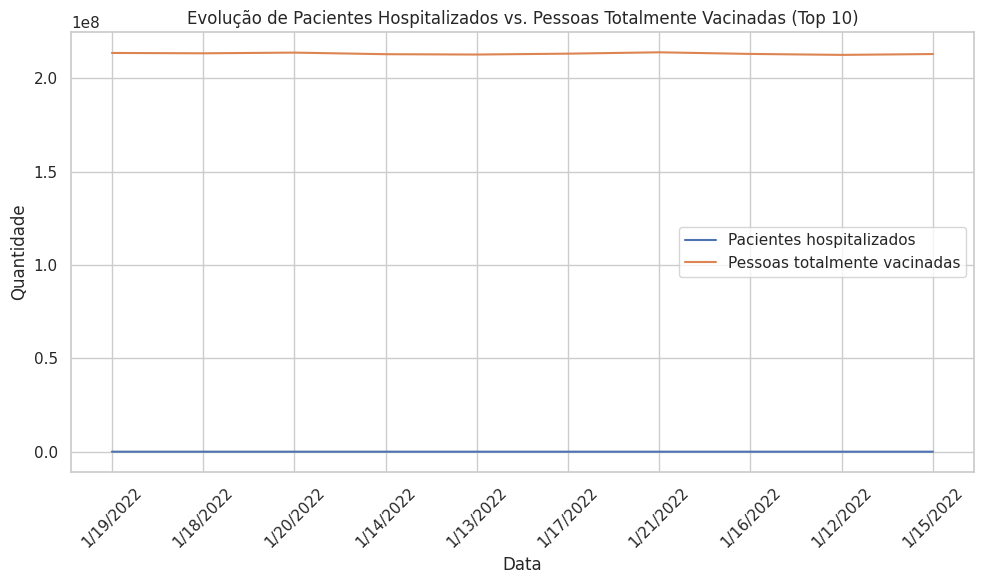

            location      continent       date  hosp_patients  \
16353  United States  North America  1/19/2022       154497.0   
16352  United States  North America  1/18/2022       153220.0   
16354  United States  North America  1/20/2022       152923.0   
16348  United States  North America  1/14/2022       152033.0   
16347  United States  North America  1/13/2022       151006.0   
16351  United States  North America  1/17/2022       150873.0   
16355  United States  North America  1/21/2022       150229.0   
16350  United States  North America  1/16/2022       149973.0   
16346  United States  North America  1/12/2022       149670.0   
16349  United States  North America  1/15/2022       149478.0   

       people_fully_vaccinated  
16353              213415940.0  
16352              213226329.0  
16354              213595432.0  
16348              212745809.0  
16347              212568557.0  
16351              213034878.0  
16355              213760000.0  
16350              2

In [103]:
top_10_dados_combinados = dados_combinados.nlargest(10, 'hosp_patients')

# Plotar um gráfico de linha para os top 10 registros
plt.figure(figsize=(10, 6))
plt.plot(top_10_dados_combinados['date'], top_10_dados_combinados['hosp_patients'], label='Pacientes hospitalizados')
plt.plot(top_10_dados_combinados['date'], top_10_dados_combinados['people_fully_vaccinated'], label='Pessoas totalmente vacinadas')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.title('Evolução de Pacientes Hospitalizados vs. Pessoas Totalmente Vacinadas (Top 10)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(top_10_dados_combinados)



---
Países com os maiores pibs foram os que tiveram as menores taxas de mortalidade?
- Verificar se as medidas necessárias para a proteção da sociedade são necessariamente mais caras ou se medidas mais baratas mas executadas de forma correta são tão efetivas quanto



In [21]:

dados_mortalidade = pd.read_csv('/content/drive/MyDrive/COVID DEATHS.csv')

paises_maior_pib = ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'France', 'India', 'Italy', 'Brazil', 'Canada']

dados_maior_pib = dados_mortalidade[dados_mortalidade['location'].isin(paises_maior_pib)]

dados_maior_pib = dados_maior_pib.dropna(subset=['total_deaths_per_million'])

dados_maior_pib_recentes = dados_maior_pib.groupby('location')['total_deaths_per_million'].last()


df_resultado = pd.DataFrame({
    'País': dados_maior_pib_recentes.index,
    'Total de Mortes por Milhão': dados_maior_pib_recentes.values
})

df_resultado

,País,Total de Mortes por Milhão
0,Brazil,3253.656
1,Canada,1355.400
2,China,84.793
3,France,2509.430
4,Germany,2056.031
5,India,374.690
6,Italy,3205.794
7,Japan,597.781
8,United Kingdom,3141.554
9,United States,3307.223


In [22]:
dados_mortalidade = pd.read_csv('/content/drive/MyDrive/COVID DEATHS.csv')

dados_mortalidade = dados_mortalidade.dropna(subset=['continent'])

dados_mortalidade_filtrados = dados_mortalidade[['location', 'total_deaths_per_million']]

dados_mortalidade_recentes = dados_mortalidade_filtrados.groupby('location')['total_deaths_per_million'].last()

df_taxa_morte = pd.DataFrame({
    'País': dados_mortalidade_recentes.index,
    'Taxa de Morte por Milhão': dados_mortalidade_recentes.values
})

df_taxa_morte_ordenado = df_taxa_morte.sort_values(by='Taxa de Morte por Milhão')
top_10_paises_menor_taxa = df_taxa_morte_ordenado.head(10)

print("Países com menor taxa de morte por milhão:")
top_10_paises_menor_taxa

Países com menor taxa de morte por milhão:


,País,Taxa de Morte por Milhão
33,Burundi,1.164
40,Chad,10.946
152,Niger,12.019
21,Benin,12.207
212,Tajikistan,12.559
203,South Sudan,12.645
213,Tanzania,12.916
153,Nigeria,14.437
194,Sierra Leone,14.525
54,Democratic Republic of Congo,14.786


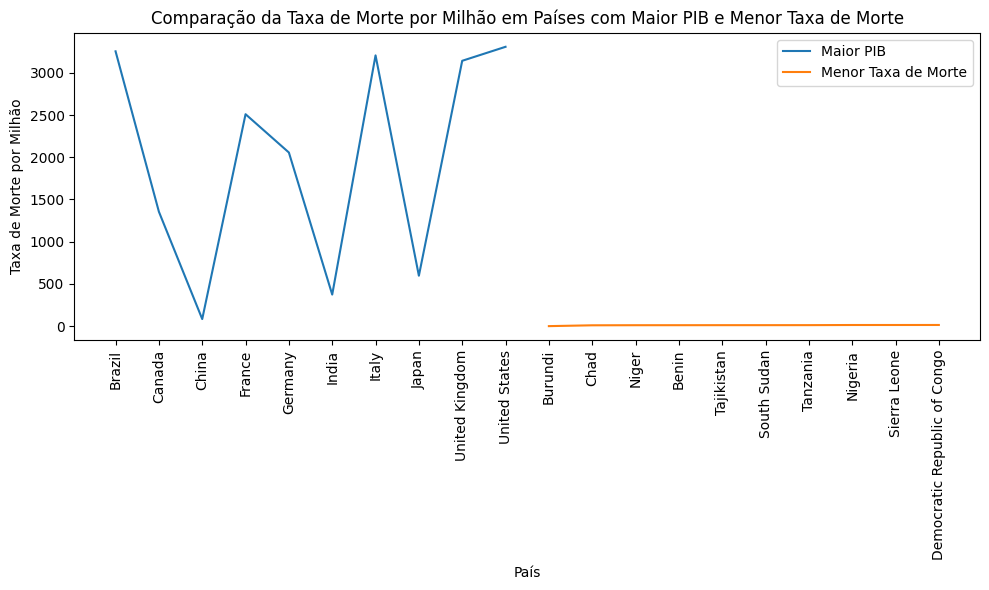

In [24]:
plt.figure(figsize=(10, 6))

plt.plot(df_resultado['País'], df_resultado['Total de Mortes por Milhão'], label='Maior PIB')
plt.plot(top_10_paises_menor_taxa['País'], top_10_paises_menor_taxa['Taxa de Morte por Milhão'], label='Menor Taxa de Morte')

plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Taxa de Morte por Milhão')
plt.title('Comparação da Taxa de Morte por Milhão em Países com Maior PIB e Menor Taxa de Morte')
plt.legend()

plt.tight_layout()
plt.show()

Olhando esses resultados podemos ver que nenhum dos países entre os 10 com maior PIB está incluso dentre os que tiveram menos mortes, portanto o PIB em si não tem correlação com a mortalidade do Covid




---


Em qual data ocorreram mais mortes por covid mundialmente ?

- Verificar o dia em que aconteceram mais mortes no mundo (soma de mortes por países).

In [ ]:
dados_covid = pd.read_csv('/content/drive/MyDrive/COVID DEATHS.csv')

dados_covid['date'] = pd.to_datetime(dados_covid['date'])

mortes_por_data = dados_covid.groupby('date')['new_deaths'].sum()

data_max_mortes = mortes_por_data.idxmax()
total_max_mortes = mortes_por_data.max()

print(f"A data com o maior número de mortes foi {data_max_mortes.date()} com um total de {total_max_mortes} mortes.")

A data com o maior número de mortes foi 2021-07-21 com um total de 80128.0 mortes.




---
"Comparar a média de mortes p/ milhão dos paises maior qtd de pessoas com vacinação completa e menor quantidade de pessoas com vacinação completa
"
- Impacto da vacinação completa na média de mortes



In [151]:
dados_vacinacao = pd.read_csv('/content/drive/MyDrive/COVID_VACCINATIONS.csv')

dados_covid_deaths = pd.read_csv('/content/drive/MyDrive/COVID DEATHS.csv')
dados_vacinacao = dados_vacinacao.dropna(subset=['continent', 'total_vaccinations_per_hundred'])

dados_agrupados_vacinacao = dados_vacinacao.groupby('location').last()

dados_recentes = dados_covid_deaths.dropna(subset=['total_deaths', 'population'])

dados_recentes = dados_recentes.groupby('location').last()

dados_merge = pd.merge(dados_recentes, dados_agrupados_vacinacao, left_index=True, right_index=True)

dados_merge['media_mortes'] = (dados_merge['total_deaths'] / dados_merge['population']) * 1000000

mais_vacinados = dados_merge.nlargest(10, 'total_vaccinations_per_hundred')
menos_vacinados = dados_merge.nsmallest(10, 'total_vaccinations_per_hundred')
menos_mortes = dados_merge.nsmallest(10, 'media_mortes')

print("\n\nMédia de mortes por milhão nos países com menor média de mortes:\n")
print(menos_mortes[['total_deaths', 'population', 'media_mortes', 'total_vaccinations_per_hundred']].to_string(index=True))

print("Média de mortes por milhão nos países com maior quantidade de pessoas vacinadas completamente:\n")
print(mais_vacinados[['total_deaths', 'population', 'media_mortes', 'total_vaccinations_per_hundred']].to_string(index=True))

print("\n\nMédia de mortes por milhão nos países com menor quantidade de pessoas vacinadas completamente:\n")
print(menos_vacinados[['total_deaths', 'population', 'media_mortes', 'total_vaccinations_per_hundred']].to_string(index=True))



Média de mortes por milhão nos países com menor média de mortes:

                              total_deaths  population  media_mortes  total_vaccinations_per_hundred
location                                                                                            
Burundi                               15.0    12889583      1.163730                            0.28
Chad                                 194.0    17723312     10.946035                           48.21
Niger                                315.0    26207982     12.019239                           28.00
Benin                                163.0    13352864     12.207119                           31.70
Tajikistan                           125.0     9952789     12.559294                          189.61
South Sudan                          138.0    10913172     12.645269                           35.74
Tanzania                             846.0    65497752     12.916474                           60.14
Nigeria                

Com esse resultado podemos ver que os paises com mair taxa de vacinação tiveram mais mortes que os países com a menor taxa.

Analisamos ainda que dentre os países com menor media de morte tem um país com menor taxa de vacinação, mas não tem nenhum com maior taxa de vacinação



---
Qual continente foi mais afetado pelo Covid?
- Analisis de mortes, numero de vacinados, taxa de vacinação por continente, qual foi o continente mais afetado



In [101]:
dados_covid = pd.read_csv('/content/drive/MyDrive/COVID DEATHS.csv')
dados_vacinacao = pd.read_csv('/content/drive/MyDrive/COVID_VACCINATIONS.csv')

dados_mortes_recentes = dados_covid.groupby('location').last()

dados_vacinacao_recentes = dados_vacinacao.groupby('location').last()

dados_mortes_recentes = dados_mortes_recentes.dropna(subset=['continent', 'total_deaths', 'total_cases'])
dados_vacinacao_recentes = dados_vacinacao_recentes.dropna(subset=['continent', 'people_vaccinated_per_hundred'])

vacinados_por_continente = dados_vacinacao_recentes.groupby('continent')['people_vaccinated_per_hundred'].sum()

mortes_por_continente = dados_mortes_recentes.groupby('continent')['total_deaths'].sum()
casos_por_continente = dados_mortes_recentes.groupby('continent')['total_cases'].sum()

taxa_vacinacao_por_continente = vacinados_por_continente / 100

taxa_mortes_por_casos_por_continente = mortes_por_continente / casos_por_continente

resultados = pd.DataFrame({
    'Total de Mortes': mortes_por_continente,
    'Total de Casos': casos_por_continente,
    'Taxa de Mortes por Casos': taxa_mortes_por_casos_por_continente,
    'Total de Vacinados (%)': taxa_vacinacao_por_continente
})

continente_mais_afetado = resultados['Total de Mortes'].idxmax()

resultados
print(f"O continente mais afetado pelo Covid é: {continente_mais_afetado}\n")
resultados

O continente mais afetado pelo Covid é: Europe



,Total de Mortes,Total de Casos,Taxa de Mortes por Casos,Total de Vacinados (%)
continent,,,,
Africa,258841.0,13072192.0,0.019801,21.8289
Asia,1628478.0,295846519.0,0.005504,34.7317
Europe,2038559.0,248182416.0,0.008214,37.7406
North America,1592266.0,123498707.0,0.012893,21.5901
Oceania,25926.0,13856597.0,0.001871,13.6320
South America,1352942.0,68326307.0,0.019801,9.8804


Com esses resultados podemos ver que a Europa foi o continente mais afetado, abaixo veremos alguns gráficos retratando esses resultados.

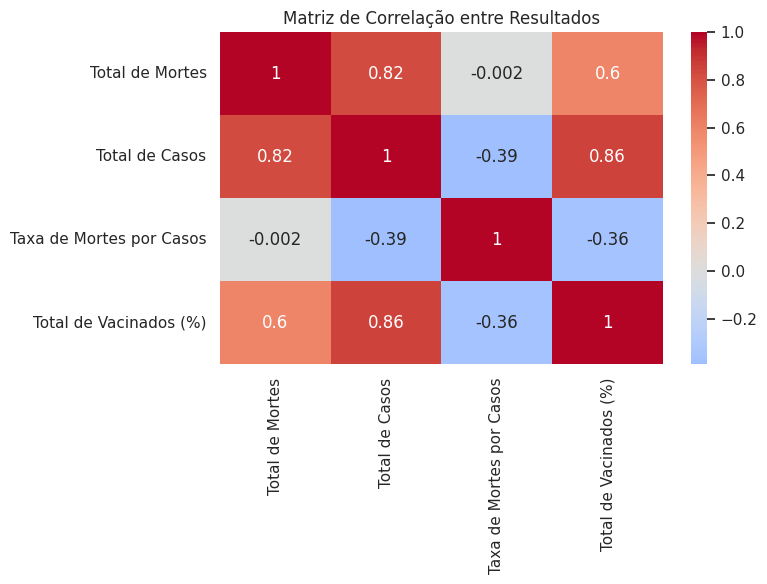

In [90]:
correlation_matrix = resultados.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Resultados')
plt.tight_layout()

plt.show()

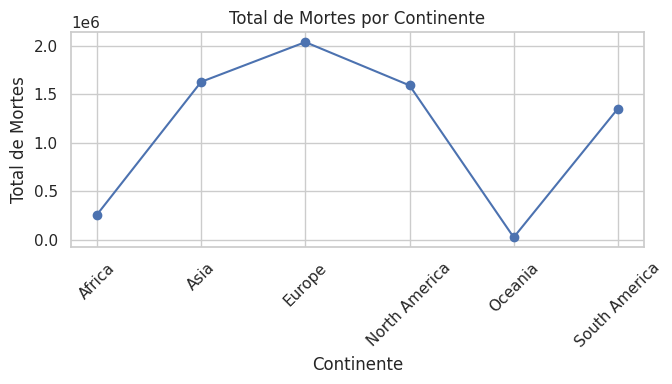

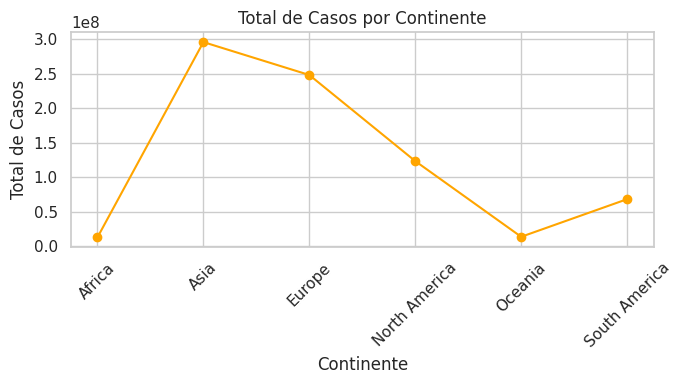

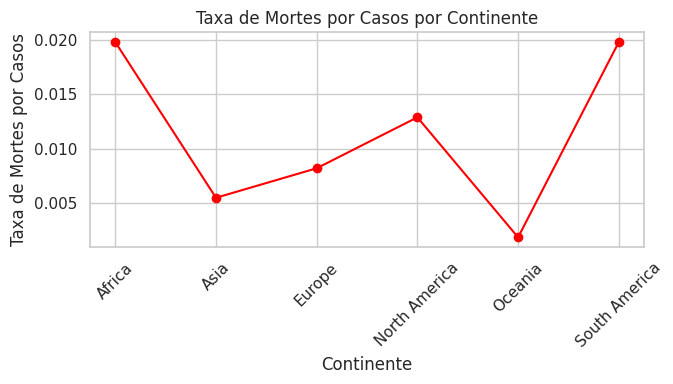

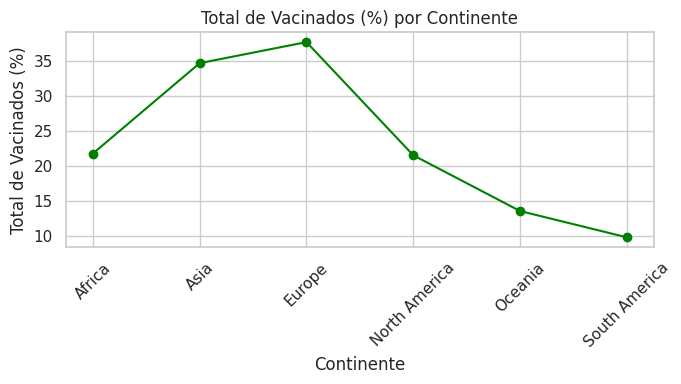

In [99]:
#grafico para o total de mortes
plt.figure(figsize=(7, 4))
plt.plot(resultados.index, resultados['Total de Mortes'], marker='o')
plt.xlabel('Continente')
plt.ylabel('Total de Mortes')
plt.title('Total de Mortes por Continente')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# gráfico de linha para Total de Casos
plt.figure(figsize=(7, 4))
plt.plot(resultados.index, resultados['Total de Casos'], marker='o', color = 'orange')
plt.xlabel('Continente')
plt.ylabel('Total de Casos')
plt.title('Total de Casos por Continente')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#gráfico de linha para Taxa de Mortes por Casos
plt.figure(figsize=(7, 4))
plt.plot(resultados.index, resultados['Taxa de Mortes por Casos'], marker='o', color = 'red')
plt.xlabel('Continente')
plt.ylabel('Taxa de Mortes por Casos')
plt.title('Taxa de Mortes por Casos por Continente')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#gráfico de linha para Total de Vacinados (%)
plt.figure(figsize=(7, 4))
plt.plot(resultados.index, resultados['Total de Vacinados (%)'], marker='o', color = 'green')
plt.xlabel('Continente')
plt.ylabel('Total de Vacinados (%)')
plt.title('Total de Vacinados (%) por Continente')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



---
Qual a Taxa de sobrevivência UTI covid?



In [ ]:
dados_covid = pd.read_csv('/content/drive/MyDrive/COVID DEATHS.csv')

dados_sem_nulos = dados_covid.dropna(subset=['icu_patients', 'total_cases', 'total_deaths'])
dados_recentes = dados_sem_nulos.groupby('location').agg({'icu_patients': 'sum', 'total_cases': 'last', 'total_deaths': 'last'})

dados_recentes['uti_survival_rate'] =dados_recentes['icu_patients']/dados_recentes['total_cases']

dados_recentes['estimated_icu_survivors'] = dados_recentes['uti_survival_rate'] * dados_recentes['icu_patients']

dados_recentes['estimated_icu_deaths'] = dados_recentes['total_deaths'] - dados_recentes['estimated_icu_survivors']

resultados = dados_recentes[['icu_patients', 'estimated_icu_survivors', 'estimated_icu_deaths']]

print(resultados)

#nesse caso não consigo ter um valor correto já que no dataset não informa as pessoas que tiveral alta
#nem que sobreviveram e nem que morretam após serem admitidas na UTI



---

Qual o top10 de países que receberam a primeira dose da vacina? E o top10 de países que receberam até a dose de reforço?

- Comparação entre o top10 dos países que receberam a primeira e todas as doses, visando saber se são os mesmos.

In [138]:
dados_vacinas = pd.read_csv('/content/drive/MyDrive/COVID_VACCINATIONS.csv')
dados_vacinas = dados_vacinas.dropna(subset=['continent'])

dados_recentes = dados_vacinas.groupby('location').last()

dados_recentes['people_partially_vaccinated_per_hundred'] = dados_recentes['people_vaccinated_per_hundred'] - dados_recentes['people_fully_vaccinated_per_hundred']

top10_vacinacao_parcial = dados_recentes.nlargest(10, 'people_partially_vaccinated_per_hundred')[['people_partially_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']]

top10_vacinacao_total = dados_recentes.nlargest(10, 'people_fully_vaccinated_per_hundred')[['people_partially_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']]

mesmos_paises = top10_vacinacao_parcial.index.isin(top10_vacinacao_total.index)

print("Top 10 países com maior quantidade de pessoas vacinadas parcialmente por cada 100:\n")
print(top10_vacinacao_parcial)
print("\n\nTop 10 países com maior quantidade de pessoas totalmente vacinadas por cada 100:\n")
print(top10_vacinacao_total)
print("\n\nOs 10 países são os mesmos nas duas categorias:\n", mesmos_paises.all())

Top 10 países com maior quantidade de pessoas vacinadas parcialmente por cada 100:

                       people_partially_vaccinated_per_hundred  \
location                                                         
Venezuela                                                25.41   
Falkland Islands                                         22.54   
Guinea                                                   21.31   
Angola                                                   19.41   
Libya                                                    15.85   
Saint Helena                                             15.36   
Kiribati                                                 14.80   
Argentina                                                14.54   
Zambia                                                   14.44   
Saint Kitts and Nevis                                    14.25   

                       people_fully_vaccinated_per_hundred  
location                                                    
V

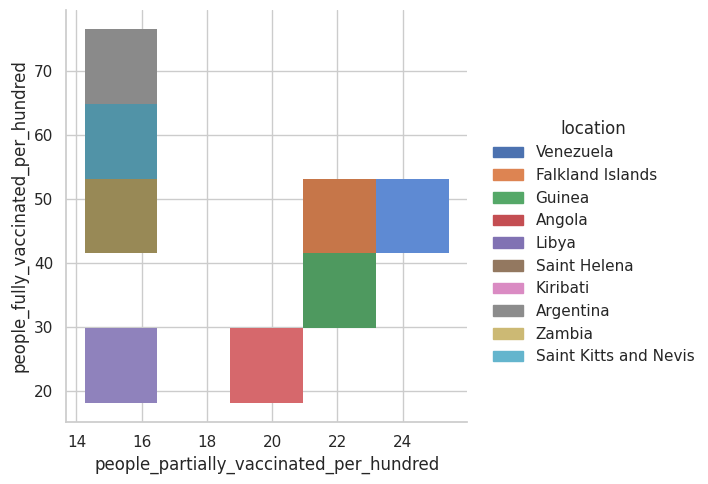

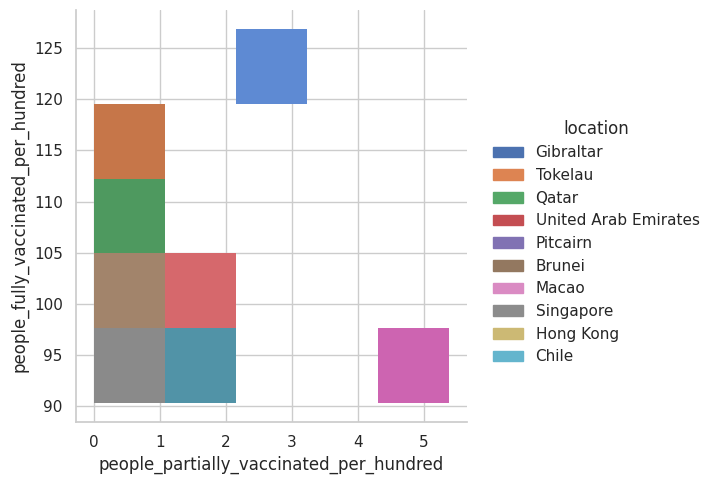

In [86]:
sns.displot(data=top10_vacinacao_parcial, x='people_partially_vaccinated_per_hundred', y='people_fully_vaccinated_per_hundred', hue='location')
sns.displot(data=top10_vacinacao_total, x='people_partially_vaccinated_per_hundred', y='people_fully_vaccinated_per_hundred', hue='location')
# Mostra o gráfico
plt.show()

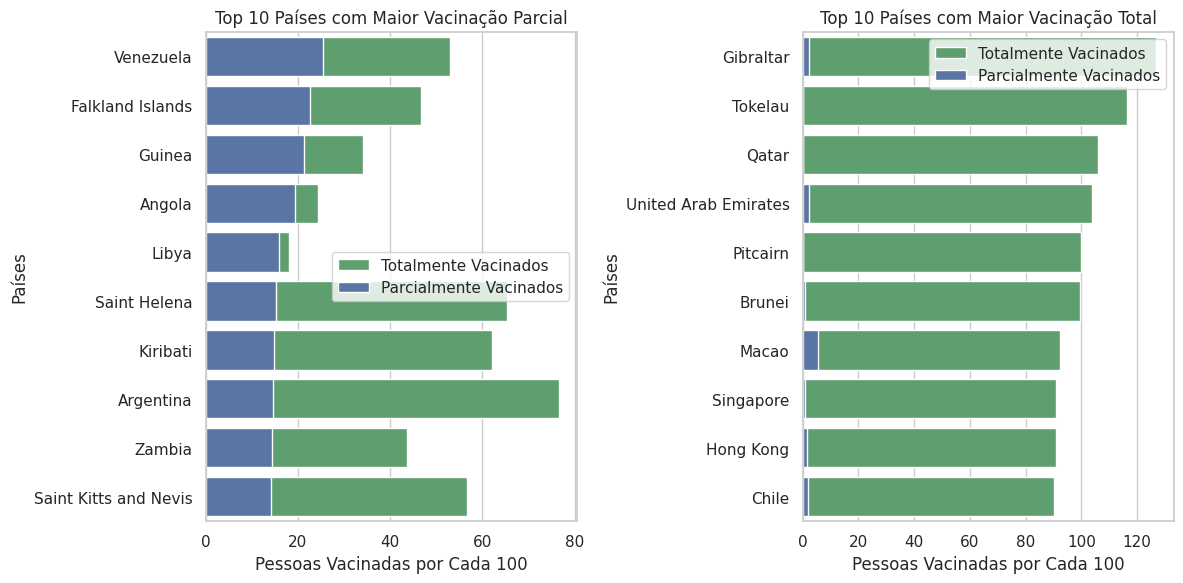

In [142]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Barplot for top 10 partially vaccinated
plt.subplot(1, 2, 1)
sns.barplot(data=top10_vacinacao_parcial, x='people_fully_vaccinated_per_hundred', y=top10_vacinacao_parcial.index, color='g', label='Totalmente Vacinados')
sns.barplot(data=top10_vacinacao_parcial, x='people_partially_vaccinated_per_hundred', y=top10_vacinacao_parcial.index, color='b', label='Parcialmente Vacinados')
plt.title('Top 10 Países com Maior Vacinação Parcial')
plt.xlabel('Pessoas Vacinadas por Cada 100')
plt.ylabel('Países')
plt.legend()

# Barplot for top 10 fully vaccinated
plt.subplot(1, 2, 2)
sns.barplot(data=top10_vacinacao_total, x='people_fully_vaccinated_per_hundred', y=top10_vacinacao_total.index, color='g', label='Totalmente Vacinados')
sns.barplot(data=top10_vacinacao_total, x='people_partially_vaccinated_per_hundred', y=top10_vacinacao_total.index, color='b', label='Parcialmente Vacinados')
plt.title('Top 10 Países com Maior Vacinação Total')
plt.xlabel('Pessoas Vacinadas por Cada 100')
plt.ylabel('Países')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Com isso concluimos que nenhum dos paises com maior taxa de aplicação da primeira dose está entre os com maior taxa de aplicação de todas as doses.



---
Qual o top10 países com maior índice de ridigez do pais e qual foi seu nível de infeção por densidade populacional?



In [136]:
dados_casos = pd.read_csv('/content/drive/MyDrive/COVID DEATHS.csv')
dados_rigidez = pd.read_csv('/content/drive/MyDrive/COVID_VACCINATIONS.csv')

dados_casos_sem_nulos = dados_casos.dropna(subset=['total_cases'])

dados_agrupados_casos = dados_casos_sem_nulos.groupby('location').agg({'total_cases': 'last'})

dados_agrupados_rigidez = dados_rigidez.groupby('location').agg({'population_density': 'mean', 'stringency_index': 'last'})

dados_completos = pd.concat([dados_agrupados_rigidez, dados_agrupados_casos], axis=1)

dados_completos['casos_por_densidade'] = dados_completos['total_cases'] / dados_completos['population_density']

top10_maior_rigidez = dados_completos.nlargest(10, 'stringency_index')

top10_maior_rigidez

,population_density,stringency_index,total_cases,casos_por_densidade
location,,,,
Iran,49.83,53.94,7597982.0,152478.065422
Zimbabwe,42.73,53.70,264584.0,6191.996256
China,147.67,47.69,99239252.0,672033.940543
Azerbaijan,119.31,44.92,830367.0,6959.743525
Pakistan,255.57,40.54,1580021.0,6182.341433
Uganda,213.76,38.44,170515.0,797.693675
Sierra Leone,104.70,37.96,7762.0,74.135626
Myanmar,81.72,37.04,634105.0,7759.483603
Guatemala,157.83,36.57,1244812.0,7887.043021


Correlação entre o índice de rigidez e o número de casos: 0.23216318224337262


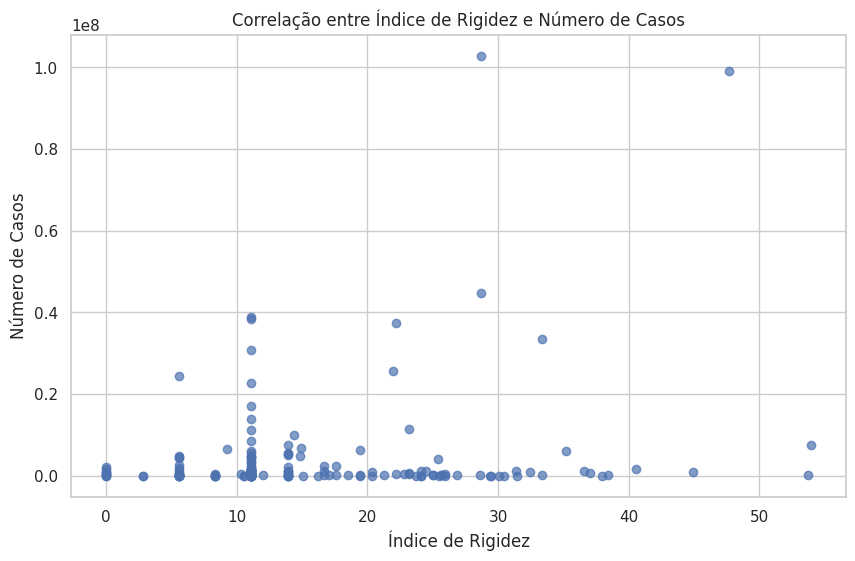

In [137]:
correlacao = dados_completos['stringency_index'].corr(dados_completos['total_cases'])

print(f"Correlação entre o índice de rigidez e o número de casos: {correlacao}")

plt.figure(figsize=(10, 6))
plt.scatter(dados_completos['stringency_index'], dados_completos['total_cases'], alpha=0.7)
plt.title('Correlação entre Índice de Rigidez e Número de Casos')
plt.xlabel('Índice de Rigidez')
plt.ylabel('Número de Casos')
plt.grid(True)
plt.show()

<Axes: ylabel='location'>

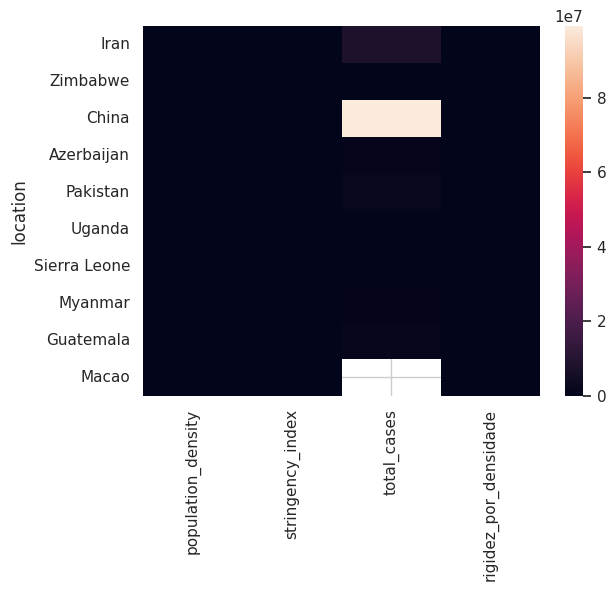

In [75]:
sns.heatmap(top10_maior_rigidez)



---
"Países com maior densidade populacional foram mais restritos na rígidez?
"


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/COVID_VACCINATIONS.csv')

correlacao = dados['population_density'].corr(dados['stringency_index'])

print(f"Correlação entre densidade populacional e nível de rigidez: {correlacao}")


Correlação entre densidade populacional e nível de rigidez: -0.009440752755615157


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/COVID_VACCINATIONS.csv')
dados_sem_nulos = dados.dropna(subset=['population_density'])

dados_agrupados = dados_sem_nulos.groupby('location').agg({'population_density': 'mean', 'stringency_index': 'last'})

paises_mais_densos = dados_agrupados.nlargest(10, 'population_density')

print(paises_mais_densos)

#nesse código estou ordenando pela maior densidade populacional

            population_density  stringency_index
location                                        
Macao                 20546.77             36.11
Monaco                19347.50             11.11
Singapore              7915.73             17.59
Hong Kong              7039.71             11.11
Gibraltar              3457.10               NaN
Bahrain                1935.91             11.11
Maldives               1454.43               NaN
Malta                  1454.04             11.11
Bermuda                1308.82             24.07
Bangladesh             1265.04             13.89


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/COVID_VACCINATIONS.csv')

dados_sem_nulos = dados.dropna(subset=['population_density'])

dados_agrupados = dados_sem_nulos.groupby('location').agg({'population_density': 'mean', 'stringency_index': 'last'})

paises_maior_rigidez = dados_agrupados.nlargest(10, 'stringency_index')

print(paises_maior_rigidez)

#já nesse ordenei pelo índice de rigidez

              population_density  stringency_index
location                                          
Iran                       49.83             53.94
Zimbabwe                   42.73             53.70
China                     147.67             47.69
Azerbaijan                119.31             44.92
Pakistan                  255.57             40.54
Uganda                    213.76             38.44
Sierra Leone              104.70             37.96
Myanmar                    81.72             37.04
Guatemala                 157.83             36.57
Macao                   20546.77             36.11


Como resultado vemos que esses dois resultados não estao relacionados. O indice de rigidez não se relaciona a uma maior densidade popupacional



---


Qual foi a quantidade de mortes por milhão de habitantes nos países sulamericanos?

- Provavelmente, ao comprar a quantidade de mortes por milhão de habitantes ajudará a ter um indicativo de quais políticas públicas seriam mais eficazes

In [130]:
dados = pd.read_csv('/content/drive/MyDrive/COVID DEATHS.csv')

dados_sul_americanos = dados[(dados['continent'] == 'South America') & (dados['total_deaths_per_million'].notnull())]

dados_sul_americanos = dados_sul_americanos.sort_values(by=['location', 'date'])

ultimos_registros = dados_sul_americanos.drop_duplicates(subset='location', keep='last')[['location', 'total_deaths_per_million']]

ultimos_registros = ultimos_registros.sort_values(by='total_deaths_per_million', ascending=False)
ultimos_registros

,location,total_deaths_per_million
211750,Peru,6343.160
36888,Brazil,3179.722
52441,Chile,3096.145
210554,Paraguay,2874.905
11746,Argentina,2851.419
54839,Colombia,2730.576
259543,Suriname,2239.316
289455,Uruguay,2178.044
73983,Ecuador,1992.834
32104,Bolivia,1817.064


Se formos analisar esse gráfico com os anteriores vemos que o peru, que é o país com maior taxa de mortalidade na América do sul, também é o país com maior taxa de mortalidade no mundo. E o Brasil, apesar de não estar entre os 10 primeiros da do mundo, está em segundo lugar com maior taxa de mortalidade de seu continente

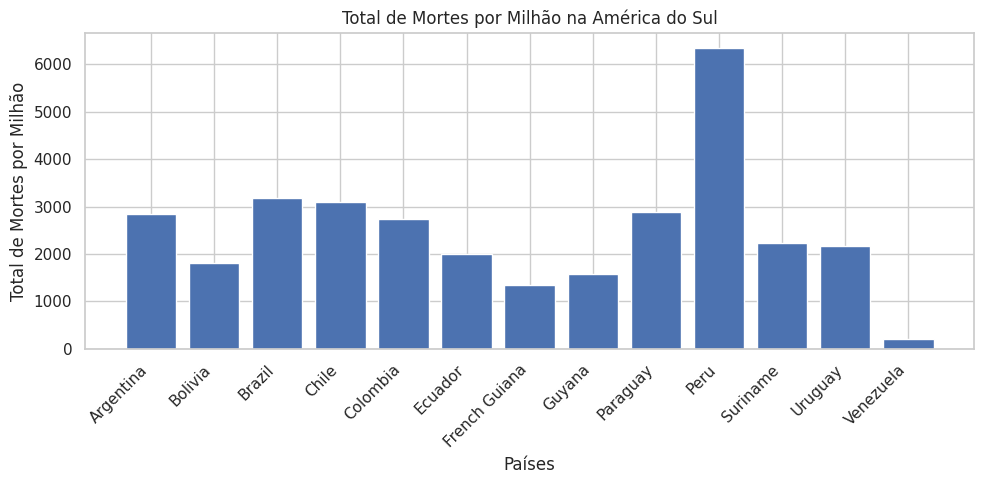

In [80]:
plt.figure(figsize=(10, 5))
plt.bar(ultimos_registros['location'], ultimos_registros['total_deaths_per_million'])
plt.xlabel('Países')
plt.ylabel('Total de Mortes por Milhão')
plt.title('Total de Mortes por Milhão na América do Sul')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

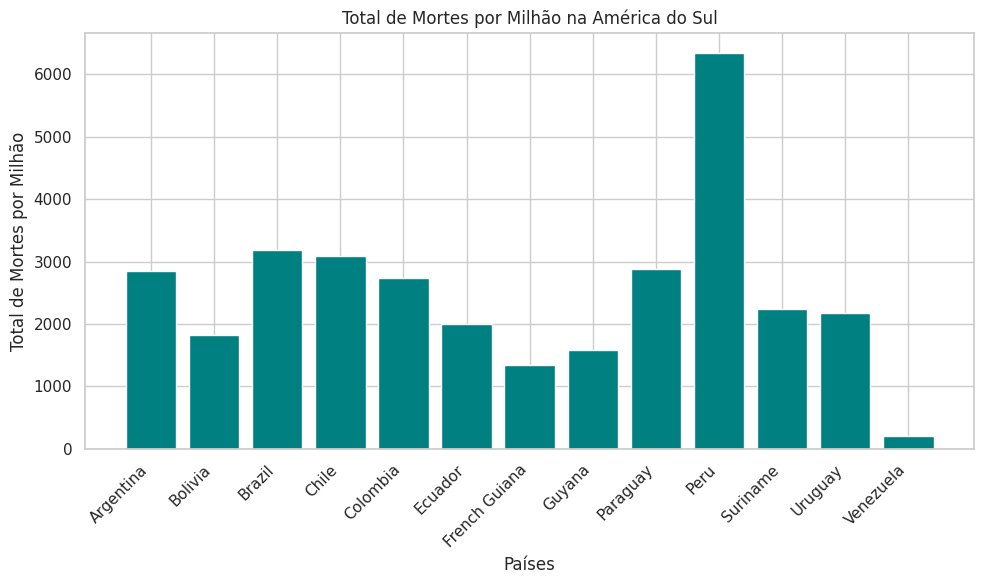

In [127]:

plt.figure(figsize=(10, 6))
plt.bar(ultimos_registros['location'], ultimos_registros['total_deaths_per_million'], color='teal')
plt.xlabel('Países')
plt.ylabel('Total de Mortes por Milhão')
plt.title('Total de Mortes por Milhão na América do Sul')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



---

Top 10 maiores valores na relaçao de quantidade de testes realizados e mortes ocorridas por país

-  Comparar a quantidade de mortes com a quantidade de pessoas testadas por milhão de pessoas por país, considerando que uma vez testada a pessoa deveria se isolar, assim diminuir a manifestação da doença e consequentemente a ocorrência de mortes.



---
Países que testaram mais pessoas tiveram menos casos positivos de Covid-19?

- Verificar se países que testaram mais conseguiram isolar essas pessoas e consequentemente ter menos casos positivos no geral





---
Os países com as maiores porcentagens de idosos tiveram as maiores taxas de mortalidade por COVID-19?

- Por os idosos fazerem parte da população de risco, pressupõe-se que os países com as maiores porcentagens desse público, tiveram, consequentemente, as maiores taxas de mortalidade.





---
Uma comparação entre o total de vacinados e o total de doses de reforço aplicados?

- Fazer um comparação entre o total de vacinados e o número de pessoas que seguindo as indicações  tomaram a dose de reforço





---
A quantidade de dados faltantes  quanto a mortes agrupados por continentes e países.

- Trazer uma panorâma da omissão de dados  durante o periodo da pandemia.





---

A taxa de reprodução do vírus (reproduction_rate) é mais intensa em países mais populosos (population)?

- É provável que o tamanho da população tenha influenciado no rápido crescimento do número de infectados





---
Qual a relação entre pacientes hospitalizados e quantidade de mortes?

- Queremos verificar a eficácia do tratamento hospitalar.




---


Países com maior índice de rigidez nas medidas restritivas tendem a ter uma taxa de vacinação mais alta?

- Países que adotaram medidas restritivas mais rigorosas podem ter demonstrado maior comprometimento em lidar com a crise, o que pode ter acarretado em um maior nível de confiança da população e influenciado positivamente no % de vacinação



---
Qual é a proporção de pessoas vacinadas que foram hospitalizadas devido à COVID-19 em comparação com pessoas não vacinadas?

- Verificar a eficácia da vacina.




---
Quais foram os 5 países com maior % de mortes em relação a sua população total?

- Verficar se houve alguma relação entre localização (continente) e contaminção.





---
Como as taxas de vacinação e mortalidade variam entre os diferentes continentes?

- Relacionar o número de mortos com o número de vacinados e gerar insights sobre a eficácia das campanhas de vacinação e seu impacto na redução de óbitos.

